# General comment section

This program calculates shear and effective normal stress on numerous fault planes (strike/dip) and the subsequent Coulomb-Friction-Failure. It also displays the calculated results on the Mohr- Coulomb Shear Failure (MCSF) envelope. A fault is likely to slip if it does not lie below the friction failure line and hence has non-negative Columb-Failure-Function (CFF) value. Required data are the three principal stresses, the angles that principal stresses make with the selected geographic coordinate system, pore pressure and friction coefficient. For the sake of this particular assignment, you may consider following data as input: faults depth = 7500ft, SHmax=34.56 MPa and Shmin=26.57 MPa, pore pressure=18.96 MPa, friction coefficient=0.6. **Stress regime is assumed Normal Faulting (NF) and hence maximum principal stress S1=Sv, intermediate principal stress S2=SHmax and minimum principal stress S3=Shmin.** 

## Program cosistes of 5 sections:
> Section I   : Calculate vertical stress, Sv from density log data <br>
> Section II  : MCSF envelope construction from provided input data <br>
> Section III : Determination of fractures stability status at a particular pore pressure <br>
> Section IV  : Pore pressure increase effect visualization on fracture activation <br>
> Section V   : Statistical Analysis <br>

In [1]:
# This statement widens the notebook page to the window size.
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

# Section I - Calculate vertical stress from density log data
## In this section, vertical stress is directly calculated from measured density log data provided by the user for the offshore well through the formula: vertical stress @ depth Z = density(water)* g * a + $\int_a^Z$density(Z)*g*dZ where g is the gravity constant and a is water depth. 

In [6]:
# Enter rock density log data versus depth. Objective is to calculate vertical stress magnitude, Sv from density log data.

DensityLogData = pd.read_csv(
    'GulfOfMexicoDensityVersusDepthData.txt', delimiter='\s+', index_col=False)

# Check the imported Density Log Data 
DensityLogData

,Depth(ft),Density,(g/cc)
0,3515,2.154,NaN
1,3516,2.126,NaN
2,3517,2.098,NaN
3,3518,2.063,NaN
4,3519,2.084,NaN
5,3520,2.114,NaN
6,3521,2.128,NaN
7,3522,2.166,NaN
8,3523,2.128,NaN
9,3524,2.114,NaN


In [7]:
# Due to an extra space in the original file headers, one unwanted null value column is created that needs to be deleted. 
# First, merge the header of the columns created due to extra spacing by renaming

DensityLogData.rename(columns={'Density': 'Density(g/cc)'}, inplace=True)

# Then delete the unwanted null values column from the dataframe
DensityLogData = DensityLogData.drop("(g/cc)", axis=1)

# Double Check the imported Density Log Data 
DensityLogData

,Depth(ft),Density(g/cc)
0,3515,2.154
1,3516,2.126
2,3517,2.098
3,3518,2.063
4,3519,2.084
5,3520,2.114
6,3521,2.128
7,3522,2.166
8,3523,2.128
9,3524,2.114


In [8]:
# Handle the missing density data from surface to the depth of 3515 ft for the offshore well with 1000 ft of water depth.
# Assume water density of 1.0 g/cc from the surface to the sea floor (1000 ft) and a typical mud density of 1.8 g/cc for the shallowest 
# seafloor sediments from 1001 ft to the start of the log (3515 ft).

MissingDensityData = pd.DataFrame({'Depth(ft)':[1000, 3514], 'Density(g/cc)':[1, 1.8]})
MissingDensityData

# Add the top missing Depth-Density Data to the DensityLogData

DensityLogData = pd.concat([MissingDensityData, DensityLogData], ignore_index=True)
DensityLogData

,Depth(ft),Density(g/cc)
0,1000,1.000
1,3514,1.800
2,3515,2.154
3,3516,2.126
4,3517,2.098
5,3518,2.063
6,3519,2.084
7,3520,2.114
8,3521,2.128
9,3522,2.166


In [10]:
# Define depth and desnity variables in SI units from imported density log data

depth_m = DensityLogData['Depth(ft)'] *0.3048
density_kg_m3 = DensityLogData['Density(g/cc)'] * 1000

# Calcuate the vertical stress for the first depth; i.e., the differential vertical stress with reference to surface with the negligable air density as: 
# depth interval with constant density * density_over the depth interval * gravity constant divided by 10**6 to convert Pascal into Megapascal (MPa)

sigma_vert_1st_depth = depth_m[0] * density_kg_m3[0] * 9.80655/10**6

# Calculate the differential vertical stress values from each two consecutive depth.  

sigma_vert_differential = np.multiply(np.array(density_kg_m3[1:]), np.array(
    depth_m[1:])-np.array(depth_m[0:-1]))*9.80665/10**6

# Add the calcuated vertical stress for the first depth to the array of vertical stress differentials. 

sigma_vert_differential = np.insert(sigma_vert_differential, 0, sigma_vert_1st_depth)

# To find the vertical stress at each depth, add each two consequtive differential vertical stress.

sigma_vert_MPa = np.cumsum(sigma_vert_differential)

# Finally, add the calculated vertical stress to the DataFrame

DensityLogData['VerticalStress(MPa)'] = sigma_vert_MPa
DensityLogData

,Depth(ft),Density(g/cc),VerticalStress(MPa)
0,1000,1.000,2.989036
1,3514,1.800,16.515162
2,3515,2.154,16.521601
3,3516,2.126,16.527955
4,3517,2.098,16.534226
5,3518,2.063,16.540393
6,3519,2.084,16.546622
7,3520,2.114,16.552941
8,3521,2.128,16.559302
9,3522,2.166,16.565776


# Section II - Mohr-Coulomb Shear Failure (MCSF) Envelope Construction
## In this section using pricipal stresses, pore presure and friction coeffcient magnitudes, MCSF Envelope as a foundation for the fracture failure analysis is plotted. 

In [11]:
# Enter depth of fractures 
depth_of_fractures_str = input(
    'Please enter the depth of fractures without unit in ft: \n') 

# Enter pricipal stress magnitudes
inter_and_min_prin_stress_magn_str = input(
    '\nPlease enter intermediate and minimum principal stress magnitudes at the depth of fractures as (S2, S3 MPa) and then press enter:\n')

# Enter pore pressure
pore_pr_str = input(
    '\nPlease enter pore pressure without unit but in the same unit as stress magnitudes and then press enter:\n')

# Enter sliding friction coefficient
fric_coeff_str = input(
    '\nPlease enetr the unitless friction of coefficient and then press enter:\n')

Please enter the depth of fractures without unit in ft: 
7500

Please enter intermediate and minimum principal stress magnitudes at the depth of fractures as (S2, S3 MPa) and then press enter:
34.56, 26.57 MPa

Please enter pore pressure without unit but in the same unit as stress magnitudes and then press enter:
18.96

Please enetr the unitless friction of coefficient and then press enter:
0.6


In [12]:
# get the intermediate and minimum stress magnitudes and the relevant unit from the input string by converting string into list

import re
inter_and_min_prin_stress_magn_list = [float(s) for s in re.findall(
    r'-?\d+\.?\d*', inter_and_min_prin_stress_magn_str)]

# get the pricipal stress magnitude unit from the numbers and unit string
unit = ''.join(x for x in inter_and_min_prin_stress_magn_str if x.isalpha())

# Exctract the intermediate and minimum principal stress magnitudes from the list

inter_prin_stress = inter_and_min_prin_stress_magn_list[0]
min_prin_stress = inter_and_min_prin_stress_magn_list[1]

# convert string to float

depth_of_frac = float(depth_of_fractures_str)
pore_pr = float(pore_pr_str)
fric_coeff = float(fric_coeff_str)

# Lookup the maximum principal stress at the input fractures depth from the calculated density log data
max_prin_stress = DensityLogData.loc[DensityLogData['Depth(ft)']
                                     == depth_of_frac, 'VerticalStress(MPa)'].tolist()[0]

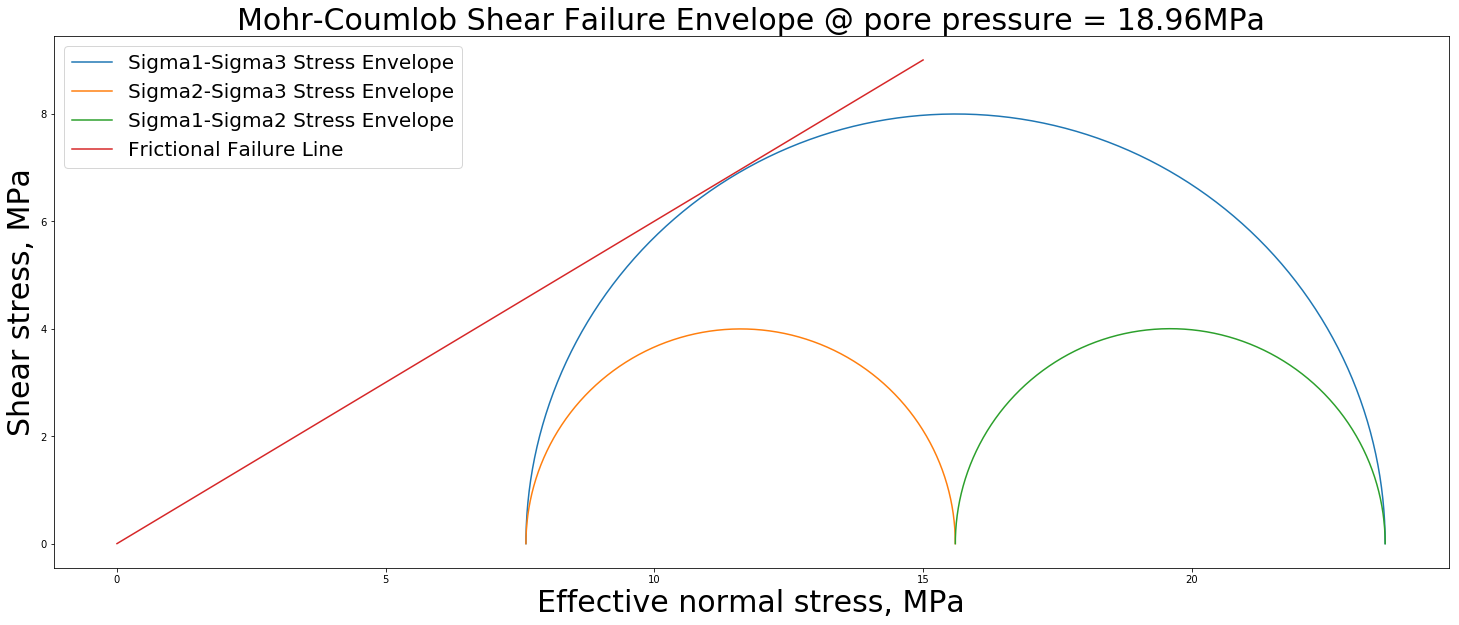

In [13]:
# Mohr-Coulomb Shear Failure Envelope

# Calculation of effctive principal stress magnitudes

sigma1 = max_prin_stress - pore_pr
sigma2 = inter_prin_stress - pore_pr
sigma3 = min_prin_stress - pore_pr

beta = np.linspace(0, np.pi, 360).reshape(360, 1)

# sigma1-sigma3 Stress Envelope

x1 = (sigma1-sigma3)/2 * np.cos(beta) + (sigma1+sigma3)/2
y1 = (sigma1-sigma3)/2 * np.sin(beta)

# sigma2-sigma3 Stress Envelope

x2 = (sigma2-sigma3)/2 * np.cos(beta) + (sigma2+sigma3)/2
y2 = (sigma2-sigma3)/2 * np.sin(beta)

# sigma1-sigma2 Stress Envelope

x3 = (sigma1-sigma2)/2 * np.cos(beta) + (sigma1+sigma2)/2
y3 = (sigma1-sigma2)/2 * np.sin(beta)

# Shear Failure Criteria

sigman = np.linspace(0, 15)
fric_fail_line = fric_coeff * sigman

# Plot construction
fig, ax = plt.subplots(figsize=(25, 15))
ax.plot(x1, y1, label="Sigma1-Sigma3 Stress Envelope")
ax.plot(x2, y2, label="Sigma2-Sigma3 Stress Envelope")
ax.plot(x3, y3, label="Sigma1-Sigma2 Stress Envelope")
ax.plot(sigman, fric_fail_line, label="Frictional Failure Line")
ax.set_aspect('equal')  # same scale for x and y axes
ax.legend(loc=2, fontsize=20)      # upper left corner
ax.set_xlabel('Effective normal stress, ' + unit, fontsize=30)
ax.set_ylabel('Shear stress, ' + unit, fontsize=30)
ax.set_title("Mohr-Coumlob Shear Failure Envelope @ pore pressure = " +
             pore_pr_str + unit, fontsize=30);

# Section III - Determination of fractures stability status at a particular pore pressure

In this section, the shear and normal stress acting on arbitrarily oriented faults in three dimensions is calculated. To obtain, the shear stress which acts in the direction of fault slip in the fault plane and the normal stress, a two step transformation is performed. Initially, principal stress magnitudes are expresses in geographical coordinate system by using the Euler (rotation) angles that define the stress coordinate system in terms of geographic coordinates. Then, using the geographical coordinate system, the stress tensor is projected on to an arbitrarily oriented fault plane with the fault orientation angles (Strike & Dip). For more details please refer to chapter 5, "Three-dimensional Mohr diagrams" section from Professor Zobacks's reservoir Geomechanics book, 2010.  

## Line orientation definitions

The orientation of a line/linear feature on a dipping plane can be defined in Trend & Plunge or independently in Rake (pitch). Line/linear feature here refers to the intersection of the principal stress plane and the fault plane. Any planar feature can be described by strike and dip while Linear features are described in Trend & Plunge, where "plunge" is the dip angle and "trend" is analogous to the dip direction value. The strike line is a non-plunging or horizontal line within a dipping plane. The rake(pitch) of a line is the angle measured in the plane between the strike line and the line of interest. Definitions are demonstrated in Figure 5.5 from Professor Zobacks's reservoir Geomechanics book, 2010. 

![Strik, Dip, Dip Direction, Rake](Figure_5.5_Reservoir_Geomechanics_Zoback.png)

### Euler (rotation) angles that define stress coordinate system in terms of geographic coordinates in degrees

a = trend of S1, except when S1 is vertical a = Trend of SHmax - 90 degrees
b = −plunge of S1 (plunge is angle from horizontal), when S1=Sv, b=-Trend of S1
C = rake of S2; 0 if S1 or S3 is vertical, 90 if S2 is vertical 

In [14]:
# Enter the Euler (rotation) angles that define stress coordinate system in terms of geographic coordinates in degrees
print('\nPlease recall the stress regime is assumed normal and hence S1=Sv and S2=SHmax!')
a_str = input(
    'Please enter trend of S1 that is the angle measured from vertical:\n')
b_str = input(
    '\nPlease enter minus plunge of S1 that is the angle measured from horizontal:\n')
c_str = input(
    '\nPlease enter the rake of S2 that is the angle measured from horizontal:\n')


Please recall the stress regime is assumed normal and hence S1=Sv and S2=SHmax!
Please enter trend of S1 that is the angle measured from vertical:
0

Please enter minus plunge of S1 that is the angle measured from horizontal:
90

Please enter the rake of S2 that is the angle measured from horizontal:
0


In [15]:
# Enter faults orientation angles as strike-azimuth w.r.t.North and dip in degress .
# If data are stored in a data file, please make sure it is in the same dirtectory of the noteook.
faults = pd.read_csv(
    '1000_Fractures_Strike_Dip_Angles_in_Degree.txt', delimiter='\s+', index_col=False)
strike_degree = faults['Strike']
dip_degree = faults['Dip']

# Convert fault and stress orientation angles to radians
strike_radian = strike_degree.map(np.radians)
dip_radian = dip_degree.map(np.radians)

In [16]:
# convert string to float

a = float(a_str)
b = float(b_str)
c = float(c_str)

# Convert Euler (rotation) angles to radians
a = np.radians(a)
b = np.radians(b)
c = np.radians(c)

In [17]:
# Define principal stress tensor in MPa
prin_stress_tensor = np.matrix([[max_prin_stress, 0, 0], [0, inter_prin_stress, 0], [0, 0, min_prin_stress]])

# Transformation from principal stress to geographic coordinates
R1 = np.matrix([[np.cos(a)*np.cos(b), np.sin(a)*np.sin(b), -np.sin(b)],
                [np.cos(a)*np.sin(b)*np.sin(c)-np.sin(a)*np.cos(c), np.sin(a)
                 * np.sin(b)*np.sin(c)+np.cos(a)*np.cos(c), np.cos(b)*np.sin(c)],
                [np.cos(a)*np.sin(b)*np.cos(c)+np.sin(a)*np.sin(c), np.sin(a)*np.sin(b)*np.cos(c)-np.cos(a)*np.sin(c), np.cos(b)*np.cos(c)]])
prin_stress_tensor_geo_coor = (R1.T).dot(prin_stress_tensor.dot(R1))

# Transformation from geographic to fault coordinate system
R2 = np.matrix([[strike_radian.map(np.cos), strike_radian.map(np.sin), 0],
                [strike_radian.map(np.sin)*dip_radian.map(np.cos), -strike_radian.map(np.cos)
                 * dip_radian.map(np.cos), -dip_radian.map(np.sin)],
                [-strike_radian.map(np.sin)*dip_radian.map(np.sin), strike_radian.map(np.cos)*dip_radian.map(np.sin), -dip_radian.map(np.cos)]])
prin_stress_tensor_fault_coor = R2.dot(prin_stress_tensor_geo_coor.dot(R2.T))

# solve for the normal stress resolved on each fault surface
normal_stress = prin_stress_tensor_fault_coor[2, 2]
normal_stress_eff = normal_stress - pore_pr

# Find the rake of the slip vector

def myfunc(x, y):
    #   Return "Arctan(x/y)" if both x&y are positive, return "pi-Arctan(x/-y)" if x negative but y positive otherwise return "Arctan(-x,-y)-pi" if both x&y are negative
    if x >= 0:
        return np.arctan2(x, y)
    elif y > 0:
        return np.pi-np.arctan2(x, -y)
    else:
        return np.arctan2(-x, -y)-np.pi


df = pd.DataFrame({'prin_stress_tensor_fault_coor_2_n_1_elt': prin_stress_tensor_fault_coor[2, 1],
                   'prin_stress_tensor_fault_coor_2_n_0_elt': prin_stress_tensor_fault_coor[2, 0]})
df['slip_vector_rake'] = np.vectorize(myfunc)(df['prin_stress_tensor_fault_coor_2_n_1_elt'], df['prin_stress_tensor_fault_coor_2_n_0_elt'])
slip_vector_rake = df['slip_vector_rake']

# One can also use df.apply Pandas command which is typically less efficient because passing and querying a Pandas series object carries significant overheads relative to NumPy arrays. 
# Pandas series include a decent amount of scaffolding to hold an index, values, attributes, etc. 

# df['slip_vector_rake'] = df.apply(lambda x: myfunc(
#     x.prin_stress_tensor_fault_coor_2_n_1_elt, x.prin_stress_tensor_fault_coor_2_n_0_elt), axis=1)

# solve for the shear stress resolved on each fault surface.
R3 = np.matrix([[slip_vector_rake.map(np.cos), slip_vector_rake.map(np.sin), 0],
                [-slip_vector_rake.map(np.sin),
                 slip_vector_rake.map(np.cos), 0],
                [0, 0, 1]])
prin_stress_tensor_fault_coor_fault_slip_dir = R3.dot(prin_stress_tensor_fault_coor.dot(R3.T))
shear_stress = prin_stress_tensor_fault_coor_fault_slip_dir[2, 0]

# Solve for Coulomb failure function (CFF) (proxy for likelihood of slip)
CFF = shear_stress-fric_coeff*normal_stress_eff

# Store calculated results along with fracture Strike and dip angles in the original degrees.
result_data = pd.DataFrame({'Strike': strike_degree, 'Dip': dip_degree, 'tau, MPa': shear_stress,
                            'sigma_n_effective, MPa': normal_stress_eff, 'CFF': CFF})
export_csv = result_data.to_csv(
    'calculated_stresses_on_faults.csv', index=None, header=True)

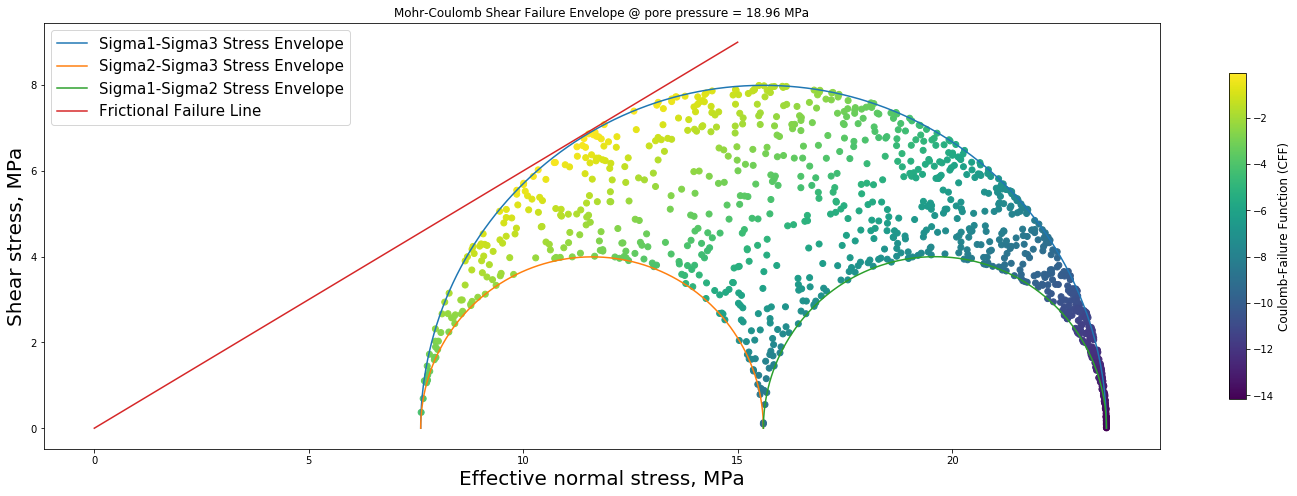

In [18]:
# Data visualization
# Plotting shear and effective normal stresses on each fracture onto the Mohr's Coulomb - Shear Failure Envelope
# First, plot the Mohr's Coulomb - Shear Failure Envelope from principal stress magnitudes, pore pressure and friction coefficient
fig, ax = plt.subplots(figsize=(25, 15))
ax.plot(x1, y1, label="Sigma1-Sigma3 Stress Envelope")
ax.plot(x2, y2, label="Sigma2-Sigma3 Stress Envelope")
ax.plot(x3, y3, label="Sigma1-Sigma2 Stress Envelope")
ax.plot(sigman, fric_fail_line, label="Frictional Failure Line")
ax.set_aspect('equal')  # same scale for x and y axes
ax.legend(loc=2, fontsize=15)      # upper left corner
ax.set_xlabel('Effective normal stress, ' + unit, fontsize=20)
ax.set_ylabel('Shear stress, ' + unit, fontsize=20)
ax.set_title("Mohr-Coulomb Shear Failure Envelope @ pore pressure = " +
             pore_pr_str +' '+ unit)
# Plot calculated shear and effective normal stresses on Mohr-Coulomb-friction failure Enevelope
sc = plt.scatter(normal_stress_eff, shear_stress, c=CFF)
cbar = fig.colorbar(sc, shrink=0.4)
cbar.set_label('Coulomb-Failure Function (CFF)', size=12, rotation=90)

# Section IV - Pore pressure increase effect visualization on fracture activation

It is a well-known geo-mechanical fact that pore pressure increase due to fluid injection into earth destabilizes fractures and make them prone to slip. This important effect of injection wells is visualized in this section. 

In [19]:
# Enter pore pressure increase. Consider a minor value like 3 MPa increase such that the subsequent change in horizontal principal stress is negligable.

pore_pr_inc_str = input(
    'Please enter pore pressure increase in the same unit as stress magnitudes and then press enter:\n')

Please enter pore pressure increase in the same unit as stress magnitudes and then press enter:
3.0


In [20]:
# convert string to float

pore_pr_inc = float(pore_pr_inc_str)

In [21]:
# Modify the normal stress on fault due to pressure increase. Please be advised that pore pressure increase does not affect the shear stress.
sigma1_pore_pr_inc = sigma1 - pore_pr_inc
sigma2_pore_pr_inc = sigma2 - pore_pr_inc
sigma3_pore_pr_inc = sigma3 - pore_pr_inc

normal_stress_eff_pore_pr_inc = normal_stress_eff - pore_pr_inc
CFF_pore_pr_inc = shear_stress - fric_coeff * normal_stress_eff_pore_pr_inc

# Store calculated results along with fracture Strike and dip angles in the original degrees.
result_data = pd.DataFrame({'Strike': strike_degree, 'Dip': dip_degree, 'tau, MPa': shear_stress,
                            'sigma_n_effective, MPa': normal_stress_eff, 'CFF': CFF, 
                            'sigma_n_effective_pore_pr_increase, MPa': normal_stress_eff_pore_pr_inc, 'CFF_pore_pr_increase': CFF_pore_pr_inc})
export_csv = result_data.to_csv(
    'calculated_stresses_on_faults.csv', index=None, header=True)

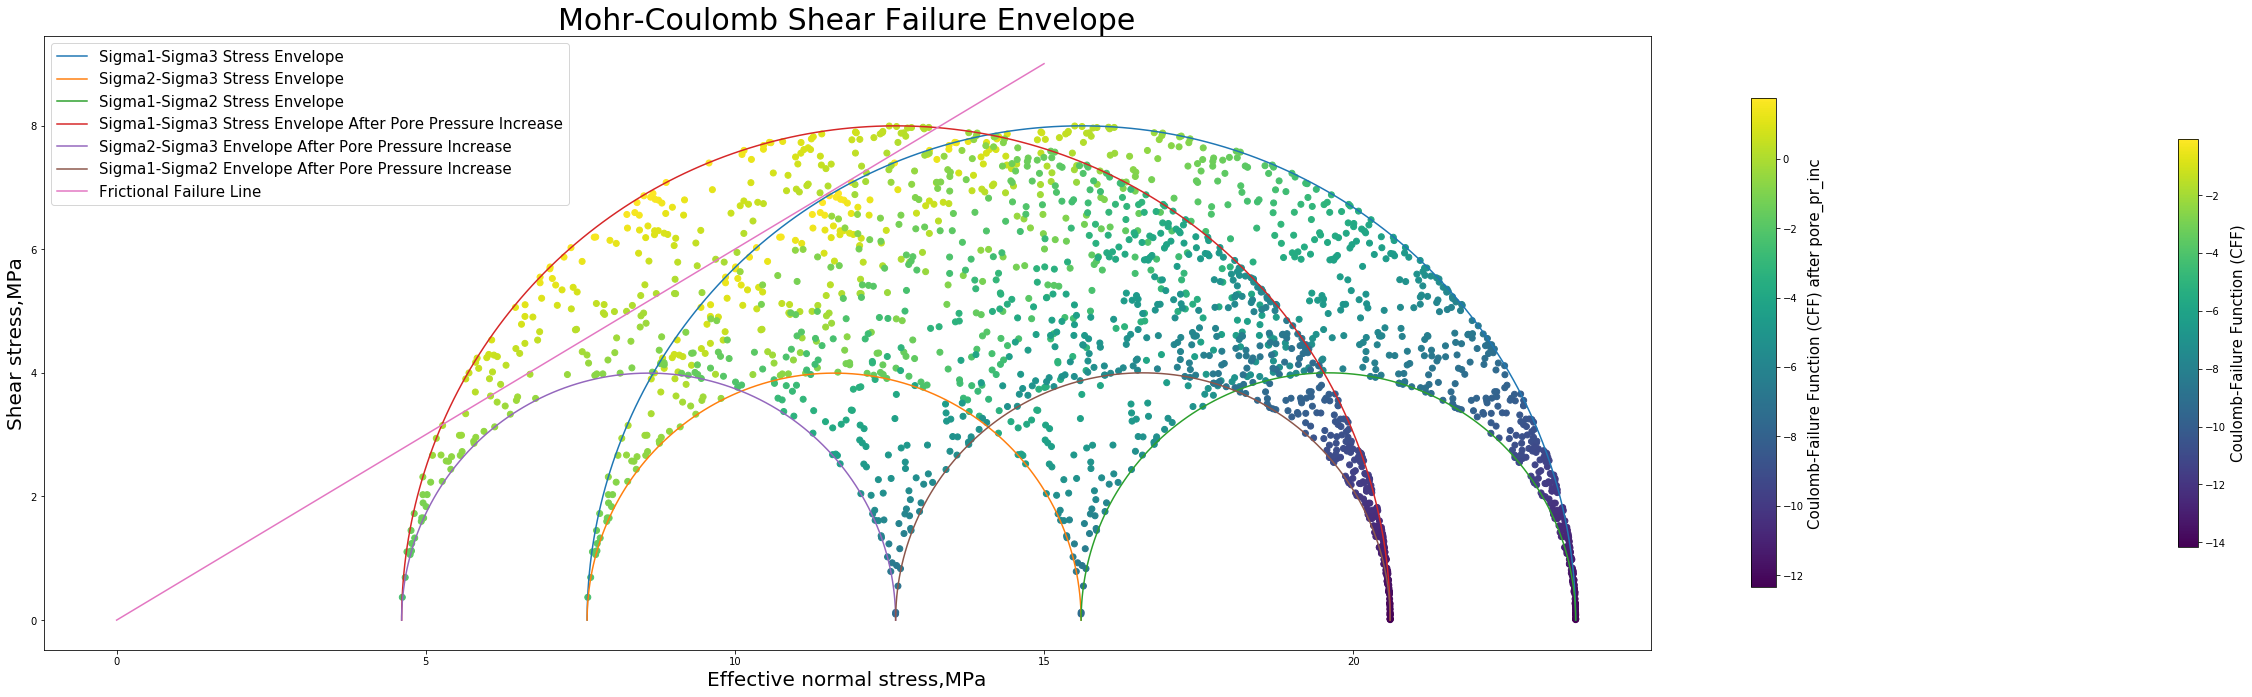

In [23]:
# Data visualization

# sigma1-sigma3 Stress Envelope

x4 = (sigma1_pore_pr_inc-sigma3_pore_pr_inc)/2 * \
    np.cos(beta) + (sigma1_pore_pr_inc+sigma3_pore_pr_inc)/2
y4 = (sigma1_pore_pr_inc-sigma3_pore_pr_inc)/2 * np.sin(beta)

# sigma2-sigma3 Stress Envelope

x5 = (sigma2_pore_pr_inc-sigma3_pore_pr_inc)/2 * \
    np.cos(beta) + (sigma2_pore_pr_inc+sigma3_pore_pr_inc)/2
y5 = (sigma2_pore_pr_inc-sigma3_pore_pr_inc)/2 * np.sin(beta)

# sigma1-sigma2 Stress Envelope

x6 = (sigma1_pore_pr_inc-sigma2_pore_pr_inc)/2 * \
    np.cos(beta) + (sigma1_pore_pr_inc+sigma2_pore_pr_inc)/2
y6 = (sigma1_pore_pr_inc-sigma2_pore_pr_inc)/2 * np.sin(beta)


# Plotting shear and effective normal stresses on each fracture onto the Mohr's Coulomb - Shear Failure Envelope
# First, plot the Mohr's Coulomb - Shear Failure Envelope from principal stress magnitudes, pore pressure and friction coefficient
fig, ax = plt.subplots(figsize=(45, 15))
ax.plot(x1, y1, label="Sigma1-Sigma3 Stress Envelope")
ax.plot(x2, y2, label="Sigma2-Sigma3 Stress Envelope")
ax.plot(x3, y3, label="Sigma1-Sigma2 Stress Envelope")
ax.plot(x4, y4, label="Sigma1-Sigma3 Stress Envelope After Pore Pressure Increase")
ax.plot(x5, y5, label="Sigma2-Sigma3 Envelope After Pore Pressure Increase")
ax.plot(x6, y6, label="Sigma1-Sigma2 Envelope After Pore Pressure Increase")
ax.plot(sigman, fric_fail_line, label="Frictional Failure Line")
# same scale for x and y axes
ax.set_aspect('equal')

# upper left corner
ax.legend(loc='upper left', fontsize = 15)

ax.set_xlabel('Effective normal stress,' + unit, fontsize=20)
ax.set_ylabel('Shear stress,' + unit, fontsize=20)
ax.set_title('Mohr-Coulomb Shear Failure Envelope', fontsize=30)

# Plot calculated shear and effective normal stresses on Mohr-Coulomb Shear Failure Envelope
sc = plt.scatter(normal_stress_eff, shear_stress, c=CFF)
cbar = fig.colorbar(sc, shrink=0.5)
cbar.set_label('Coulomb-Failure Function (CFF)', size=15, rotation=90, fontsize=15)

# Plot calculated shear and effective normal stresses on Mohr-Coulomb Shear Failure Envelope after pore pressure increase
sc_pore_pr_inc = plt.scatter(normal_stress_eff_pore_pr_inc, shear_stress, c=CFF_pore_pr_inc)
cbar_pore_pr_inc = fig.colorbar(sc_pore_pr_inc, shrink=0.6)
cbar_pore_pr_inc.set_label(
    'Coulomb-Failure Function (CFF) after pore_pr_inc', size=15, rotation=90, fontsize=15)

# Section V - Statistical Analysis 

In this section, orientation angles (Strikes and Dips) of all activated faults due to pore pressure increase are exctracted so that the average slip direction can be compared with the maximum horzontal stress, *SHmax which is orientated E-W (Strike = 90°)*. **Faults parallel to SHmax (normal to the Shmin) are activated and have higher CFF values.**

In [24]:
# Number of faults that are likely to slip before and after the pore pressure increase
slipping_faults = [i for i in CFF if i >= 0]
slipping_faults_no = len(slipping_faults)
slipping_faults_pore_pr_inc = [i for i in CFF_pore_pr_inc if i >= 0]
slipping_faults_no_pore_pr_inc = len(slipping_faults_pore_pr_inc)
print(("Initially, "+f"out of the total {len(faults)} faults, {slipping_faults_no} fault(s) is/are likely to slip; while after"+
       ' '+ pore_pr_inc_str + ' ' + unit + ' ' "pore pressure increase, "+ f"{slipping_faults_no_pore_pr_inc} faults are likely to slip.")) 

Initially, out of the total 1000 faults, 0 fault(s) is/are likely to slip; while after 3.0 MPa pore pressure increase, 154 faults are likely to slip.


In [25]:
# Sort faults that are activated based on positive CFF values

activated_faults = result_data[result_data.CFF_pore_pr_increase>=0]
activated_faults_sorted = activated_faults.sort_values(by=['Strike'])
activated_faults_sorted

,Strike,Dip,"tau, MPa","sigma_n_effective, MPa",CFF,"sigma_n_effective_pore_pr_increase, MPa",CFF_pore_pr_increase
708,54.79,72.46,5.249704,11.477118,-1.636567,8.477118,0.163433
706,54.86,56.24,6.911606,14.377207,-1.714718,11.377207,0.085282
868,57.83,56.01,7.027167,14.164202,-1.471354,11.164202,0.328646
880,58.17,55.78,7.052985,14.186219,-1.458746,11.186219,0.341254
515,59.23,60.43,6.701710,13.085673,-1.149693,10.085673,0.650307
767,59.43,68.12,5.807010,11.610205,-1.159113,8.610205,0.640887
127,60.05,59.79,6.779904,13.145325,-1.107290,10.145325,0.692710
468,60.13,65.27,6.176600,12.043193,-1.049316,9.043193,0.750684
809,61.60,53.34,7.302505,14.472943,-1.381261,11.472943,0.418739
145,62.22,64.88,6.237960,11.914266,-0.910600,8.914266,0.889400


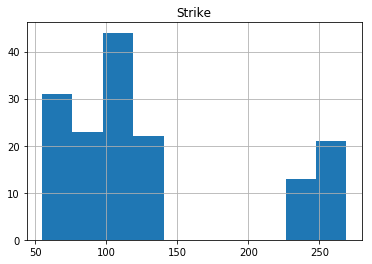

In [26]:
# Plot a histogram of activated faults 

activated_faults.hist(column='Strike');

In [27]:
# Bin strikes and sort faults

strike_bins = pd.cut(activated_faults.loc[:, 'Strike'], np.arange(0, 361, 30))
activated_faults_sorted['strike_bins'] = pd.cut(
    activated_faults.loc[:, 'Strike'], np.arange(0, 361, 30))
activated_faults_sorted

,Strike,Dip,"tau, MPa","sigma_n_effective, MPa",CFF,"sigma_n_effective_pore_pr_increase, MPa",CFF_pore_pr_increase,strike_bins
708,54.79,72.46,5.249704,11.477118,-1.636567,8.477118,0.163433,"(30, 60]"
706,54.86,56.24,6.911606,14.377207,-1.714718,11.377207,0.085282,"(30, 60]"
868,57.83,56.01,7.027167,14.164202,-1.471354,11.164202,0.328646,"(30, 60]"
880,58.17,55.78,7.052985,14.186219,-1.458746,11.186219,0.341254,"(30, 60]"
515,59.23,60.43,6.701710,13.085673,-1.149693,10.085673,0.650307,"(30, 60]"
767,59.43,68.12,5.807010,11.610205,-1.159113,8.610205,0.640887,"(30, 60]"
127,60.05,59.79,6.779904,13.145325,-1.107290,10.145325,0.692710,"(60, 90]"
468,60.13,65.27,6.176600,12.043193,-1.049316,9.043193,0.750684,"(60, 90]"
809,61.60,53.34,7.302505,14.472943,-1.381261,11.472943,0.418739,"(60, 90]"
145,62.22,64.88,6.237960,11.914266,-0.910600,8.914266,0.889400,"(60, 90]"


In [28]:
# Find the distribution of activated faults and their pertinent average Coulom-Failure Function (CFF) criterion

strike_bins_frequency = pd.value_counts(strike_bins, sort=False)
activated_faults_sorted.groupby('strike_bins').CFF_pore_pr_increase.mean()
fault_slip_potential = pd.DataFrame({'frequency': strike_bins_frequency, 'CFF_mean': activated_faults_sorted.groupby(
    'strike_bins').CFF_pore_pr_increase.mean()})
fault_slip_potential

,frequency,CFF_mean
"(0, 30]",0,NaN
"(30, 60]",6,0.368301
"(60, 90]",40,0.857967
"(90, 120]",55,0.892094
"(120, 150]",19,0.323839
"(150, 180]",0,NaN
"(180, 210]",0,NaN
"(210, 240]",7,0.251079
"(240, 270]",27,0.984271
"(270, 300]",0,NaN


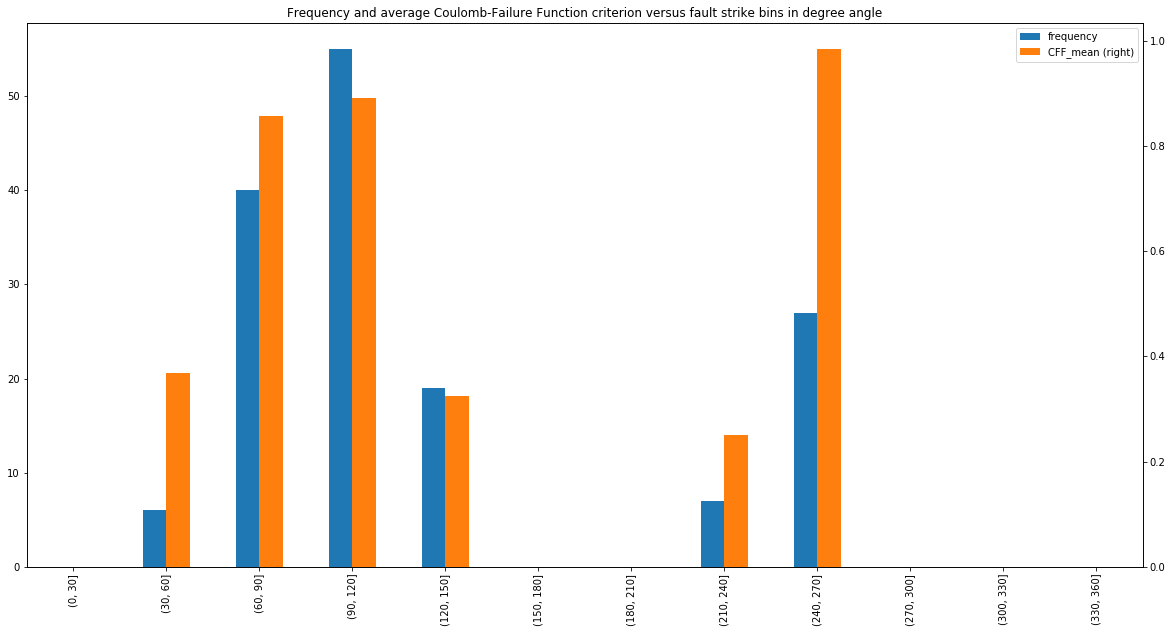

In [29]:
# Plot the Fault Slip Potential (FSP) and the pertinent average Coulom-Failure Function (CFF) criterion

fault_slip_potential.plot(kind='bar', secondary_y='CFF_mean', figsize=(
    20, 10), title='Frequency and average Coulomb-Failure Function criterion versus fault strike bins in degree angle')

In [30]:
%load_ext version_information
%version_information numpy, pandas, matplotlib, version_information

Software versions
Python 3.7.3 64bit [MSC v.1915 64 bit (AMD64)]
IPython 7.4.0
OS Windows 10 10.0.17763 SP0
numpy 1.16.2
pandas 0.24.2
matplotlib 3.0.3
version_information 1.0.3
Thu Aug 08 15:31:06 2019 Mountain Daylight Time